In [1]:
!kaggle datasets download -d anthonytherrien/dog-vs-cat

Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0
100% 360M/360M [00:17<00:00, 23.9MB/s]
100% 360M/360M [00:17<00:00, 21.7MB/s]


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
!cp "/content/dog-vs-cat.zip" "/content/drive/MyDrive/dog-vs-cat.zip"

cp: cannot create regular file '/content/drive/MyDrive/dog-vs-cat.zip': No such file or directory


In [3]:
!unzip -qq dog-vs-cat.zip

In [4]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow import keras
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
list_paths = []
for folder in os.listdir('/content/animal'):
  for file in os.listdir('/content/animal/'+folder):
    list_paths.append('/content/animal/'+folder+'/'+file)

print(list_paths)

['/content/animal/dog/00569-3846168731.png', '/content/animal/dog/00505-3846168667.png', '/content/animal/dog/00966-3846169128.png', '/content/animal/dog/00735-3846168897.png', '/content/animal/dog/00952-3846169114.png', '/content/animal/dog/00815-3846168977.png', '/content/animal/dog/00704-3846168866.png', '/content/animal/dog/00985-127787239.png', '/content/animal/dog/00594-3846168756.png', '/content/animal/dog/00547-3846168709.png', '/content/animal/dog/00830-3846168992.png', '/content/animal/dog/00892-3846169054.png', '/content/animal/dog/00991-127787245.png', '/content/animal/dog/00728-3846168890.png', '/content/animal/dog/00638-3846168800.png', '/content/animal/dog/00507-3846168669.png', '/content/animal/dog/00798-3846168960.png', '/content/animal/dog/00894-3846169056.png', '/content/animal/dog/00764-3846168926.png', '/content/animal/dog/00726-3846168888.png', '/content/animal/dog/00887-3846169049.png', '/content/animal/dog/00734-3846168896.png', '/content/animal/dog/00678-384616

In [9]:
import cv2

In [274]:
array_list_gray = []
array_list_rgb = []
for i in list_paths:
  img = cv2.imread(i)
  img = cv2.resize(img, (56, 56))
  array_list_rgb.append(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = np.reshape(img, (56, 56 ,1))

  array_list_gray.append(img)
array_list_gray = np.array(array_list_gray)
array_list_rgb = np.array(array_list_rgb)

In [275]:
array_list_gray.shape


(1000, 56, 56, 1)

array([[[118, 128, 132],
        [113, 124, 129],
        [ 98, 112, 117],
        ...,
        [206, 212, 212],
        [206, 212, 212],
        [210, 215, 215]],

       [[117, 127, 131],
        [113, 122, 128],
        [ 97, 111, 116],
        ...,
        [204, 210, 209],
        [204, 210, 209],
        [208, 213, 213]],

       [[117, 126, 131],
        [112, 120, 128],
        [ 96, 110, 115],
        ...,
        [203, 209, 208],
        [203, 209, 208],
        [205, 212, 211]],

       ...,

       [[145, 168, 192],
        [140, 168, 190],
        [142, 165, 187],
        ...,
        [138, 159, 179],
        [137, 159, 179],
        [150, 172, 193]],

       [[146, 167, 190],
        [157, 178, 199],
        [136, 158, 179],
        ...,
        [137, 159, 180],
        [140, 162, 182],
        [151, 172, 192]],

       [[151, 175, 197],
        [131, 154, 175],
        [127, 152, 174],
        ...,
        [137, 161, 181],
        [152, 176, 196],
        [129, 151, 172]]], dtype=uint8)
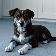

In [276]:
array_list_rgb[0]

In [277]:
array_list_gray = array_list_gray.astype('float32') / 255
array_list_rgb = array_list_rgb.astype('float32') / 255


In [278]:
input_shape = (56, 56, 1)
batch_size = 50
kernel_size = 3

In [279]:
inputs = Input(shape=input_shape)
x = inputs
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
h = MaxPooling2D((2, 2), padding='same')(x)


In [280]:

x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(h)
x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
outputs = Conv2DTranspose(3, (3, 3), strides=(1, 1), padding='same', activation='sigmoid')(x)

decoder = Model(inputs, outputs)

In [281]:
decoder.summary()

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_43 (InputLayer)          │ (None, 56, 56, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 56, 56, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_126                 │ (None, 14, 14, 128)         │         147,584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_127                 │ (None, 28, 28, 64)          │          73,792 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_128                 │ (None, 56, 56, 32)          │          18,464 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_129                 │ (None, 56, 56, 3)           │             867 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,379 (1.27 MB)

 Trainable params: 333,379 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [282]:
decoder.compile(loss='mse', optimizer='adam')

In [283]:
decoder.fit(array_list_gray, array_list_rgb, epochs=50, batch_size=batch_size)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0731
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0526
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0357
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0277
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0241
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0218
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0213
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0197
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0197
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0190
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0182
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0177
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0175
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0172
Epoch 15/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0170
Epoc

In [284]:
x_decoded = decoder.predict(array_list_gray)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [262]:
x_decoded = (x_decoded * 255).astype(np.uint8)


<ipython-input-285-4c648c3c3a10>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,4,1)


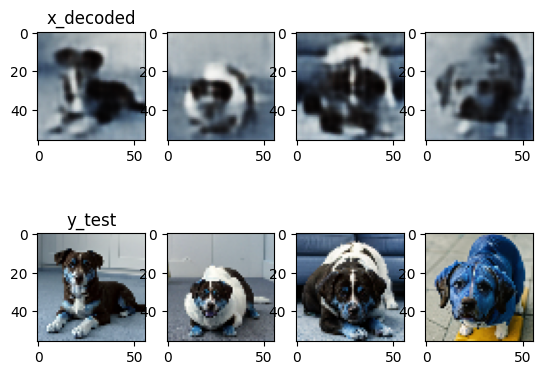

In [285]:
plt.figure()
plt.title("x_decode")
ax1 = plt.subplot(2,4,1)
ax1.title.set_text('x_decoded')
plt.imshow(x_decoded[0])
plt.subplot(2,4,2)
plt.imshow(x_decoded[1])
plt.subplot(2,4,3)
plt.imshow(x_decoded[2])
plt.subplot(2,4,4)
plt.imshow(x_decoded[3])
ax2 = plt.subplot(2,4,5)
ax2.title.set_text('y_test')
plt.imshow(array_list_rgb[0])
plt.subplot(2,4,6)
plt.imshow(array_list_rgb[1])
plt.subplot(2,4,7)
plt.imshow(array_list_rgb[2])
plt.subplot(2,4,8)
plt.imshow(array_list_rgb[3])